# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [239]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mplfinance as mpf
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
import warnings

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [288]:
coins = pd.read_csv('coins.csv', index_col='date', parse_dates=True)

Посмотрим что получилось

In [241]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [242]:
number_of_different = len(set(coins['name']))
number_of_different

70

### 2. За какой период данные мы имеем? (0.4 балла)

In [243]:
period = "От {} до {}".format(coins.index[0], coins.index[len(coins.index) - 1])
period

'От 2013-04-28 до 2018-06-06'

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [244]:
skips_exists = coins.isnull().values.any()
skips_exists

True

Посмотрим в каких столбцах сущетсвуют пропуски

In [245]:
for coin in coins:
    if coins[coin].isnull().values.any():
        print(coin)

price
txCount
txVolume
activeAddresses


Пропуски вызваны недостатком информации о средней цене монеты, количеству транзакций в сети данной монеты,
объему монет переведенных между адресами в сети данной монеты и количеству адресов совершавших а данный день транзации в сети данной монеты

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [246]:
max_price_coin = coins[coins['price'] == max(coins['price'])]['name']
max_price_coin

date
2017-12-17    Bitcoin
Name: name, dtype: object

### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

In [247]:
coins_mean_market = coins.groupby(['symbol'])['market'].agg('mean')

max_coin = coins_mean_market[coins_mean_market.values == max(coins_mean_market.values)]
min_coin = coins_mean_market[coins_mean_market.values == min(coins_mean_market.values)]

max_result = "Max name: {}, value: {}".format(max_coin.index[0], max_coin.values[0])
min_result = "Min name: {}, value: {}".format(min_coin.index[0], min_coin.values[0])

print(max_result)
print(min_result)

Max name: BTC, value: 30782136351.01822
Min name: VTC, value: 28203506.20262664


Круговая диаграмма:

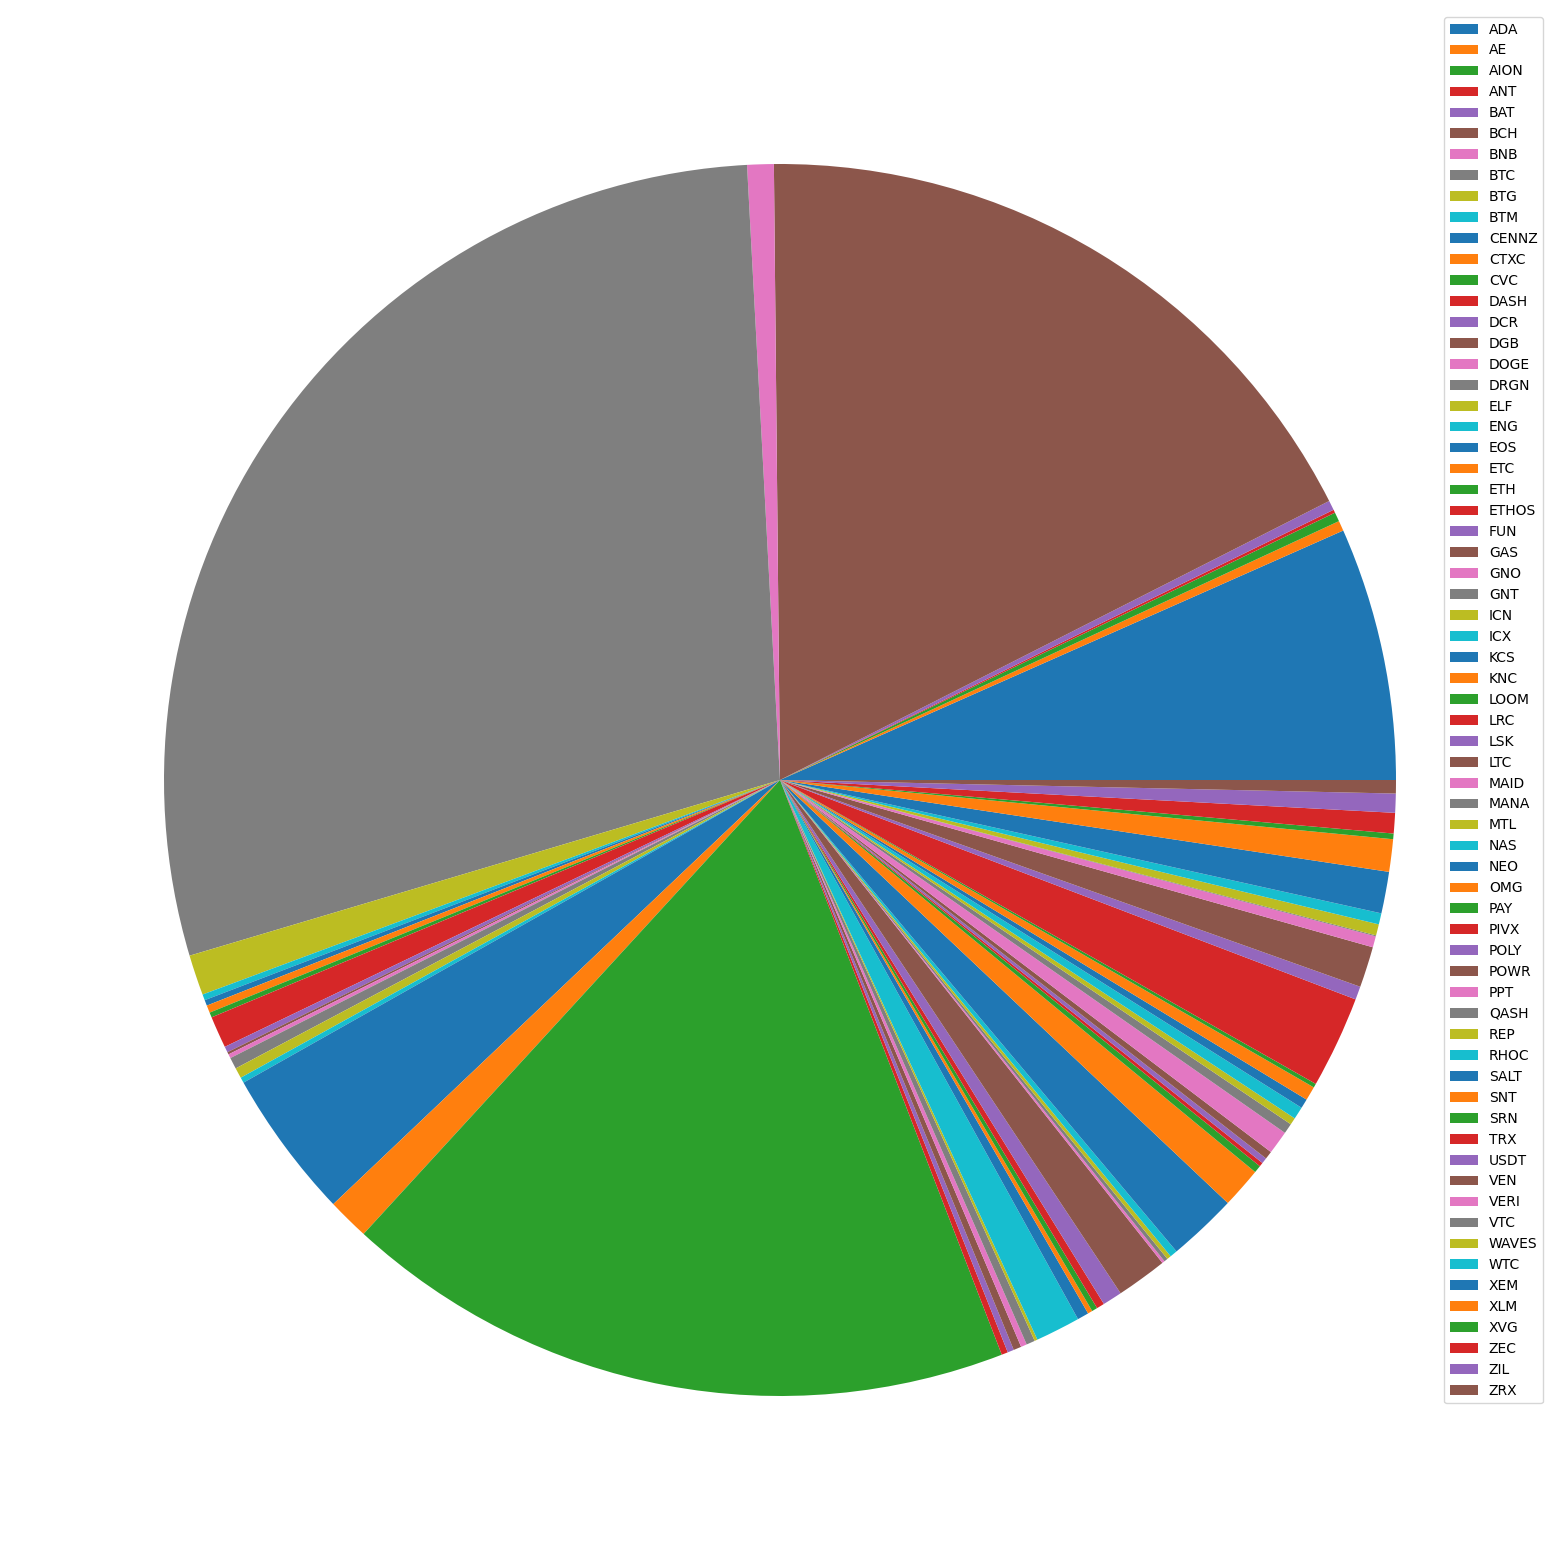

In [248]:
plot = coins_mean_market.plot.pie(figsize=(20, 20), legend=True, labeldistance=None, ylabel="").legend(loc="upper right")

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [257]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot()

    ax.set_title('Цена данной валюты за выбранный период')
    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена')

    data = coins.loc[coins['symbol'] == symbol].loc[start_date:end_date, ['open', 'close', 'high', 'low']]

    ax.plot(data.index, data['close'], color = 'blue', label = 'Цена в конце дня')
    ax.plot(data.index, data['open'], color = 'purple', label = "Цена в начале дня")
    ax.plot(data.index, data['high'], color = 'orange', label = "Максимальная цена дня")
    ax.plot(data.index, data['low'], color = 'green', label = "Минимальная цена дня")
    
    ax.set_xticks(data.index.values[::data.shape[0] // 7])
    ax.legend(loc='upper right')
    ax.grid()
    plt.show()
    

Посмотрим, что получилось:

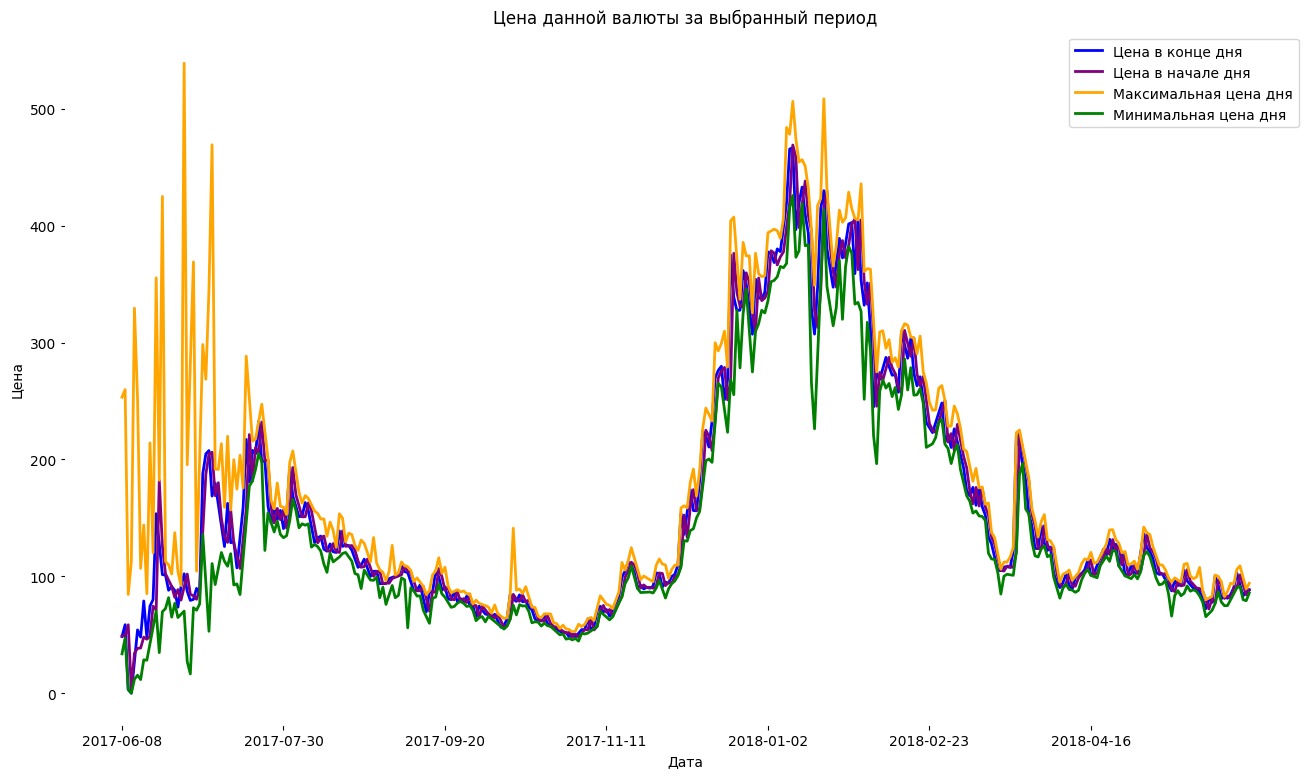

In [258]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [259]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    day = coin.index

    max_day = None
    pnd = None
    
    for date, high, open, close in zip(day, coin['high'], coin['open'], coin['close']):
        cur_pnd = high / max(open, close)
        if pnd is None or cur_pnd > pnd:
            pnd = cur_pnd
            max_day = date

    print(f"Max pnd: {pnd}\nDay with max pnd: {max_day}")

In [260]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

Max pnd: 1.1428940004366206
Day with max pnd: 2017-11-29


Сравните эти значения для разных монет:

In [261]:
for sym in set(coins['symbol']):
    find_most_severe_pump_and_dump(coins, symbol=sym, start_date='2017-06-01', end_date='2018-06-01')

Max pnd: 1.8054444587795122
Day with max pnd: 2018-04-25
Max pnd: 1.6882121234525305
Day with max pnd: 2018-04-13
Max pnd: 1.2031621370259378
Day with max pnd: 2017-11-29
Max pnd: 1.176079734219269
Day with max pnd: 2017-12-26
Max pnd: 4.528409090909091
Day with max pnd: 2017-09-23
Max pnd: 2.9702777900454884
Day with max pnd: 2017-09-21
Max pnd: 1.2808988764044942
Day with max pnd: 2018-01-05
Max pnd: 1.3587962962962963
Day with max pnd: 2017-11-28
Max pnd: 5.075208458226606
Day with max pnd: 2017-10-08
Max pnd: 1.3202933985330074
Day with max pnd: 2017-07-03
Max pnd: 1.1433508255471652
Day with max pnd: 2017-07-18
Max pnd: 1.6728538283062646
Day with max pnd: 2017-11-20
Max pnd: 1.1358695652173911
Day with max pnd: 2018-01-04
Max pnd: 1.4986168741355463
Day with max pnd: 2018-01-13
Max pnd: 1.2538461538461536
Day with max pnd: 2017-12-16
Max pnd: 2.586337382991436
Day with max pnd: 2017-12-07
Max pnd: 5.777033492822967
Day with max pnd: 2018-02-21
Max pnd: 1.653659748974773
Day with 

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [262]:
def compute_roi(coins, investments, start_date, end_date):
    price = coins[['symbol', 'price']]

    entrance = price.loc[start_date]
    exit = price.loc[end_date]

    start_sum = 0;
    for value in investments.values():
        start_sum += value

    counter_coins = {}
    for symbol in investments:
        counter_coins[symbol] = investments[symbol] / entrance['price'][entrance['symbol'] == symbol][0]

    end_sum = 0
    for key, value in counter_coins.items():
        end_sum += value * exit['price'][exit['symbol'] == key][0]

    print(f"ROI: {(end_sum - start_sum) / start_sum}")

In [263]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

ROI: -0.035569133065275614


In [264]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

ROI: 51.28330296529592


## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [265]:
def plot_bollinger_bands(coins, symbol, window, width):
    df = pd.DataFrame()
    df['price'] = coins[coins['symbol'] == symbol]['price']
    df['mean'] = df['price'].rolling(window).mean()
    df['std'] = df['price'].rolling(window).std()
    df['high'] = df['mean'] + df['std'] * width
    df['low'] = df['mean'] - df['std'] * width
    
    df[['price', 'high', 'low']].plot(figsize=(16,9))
    plt.title("Границы Болинджера для {}".format(symbol))
    plt.ylabel("Цена")
    plt.xlabel("Дата")
    plt.legend(["Цена", "Верхняя граница", "Нижняя граница"], loc='upper left')
    plt.show()

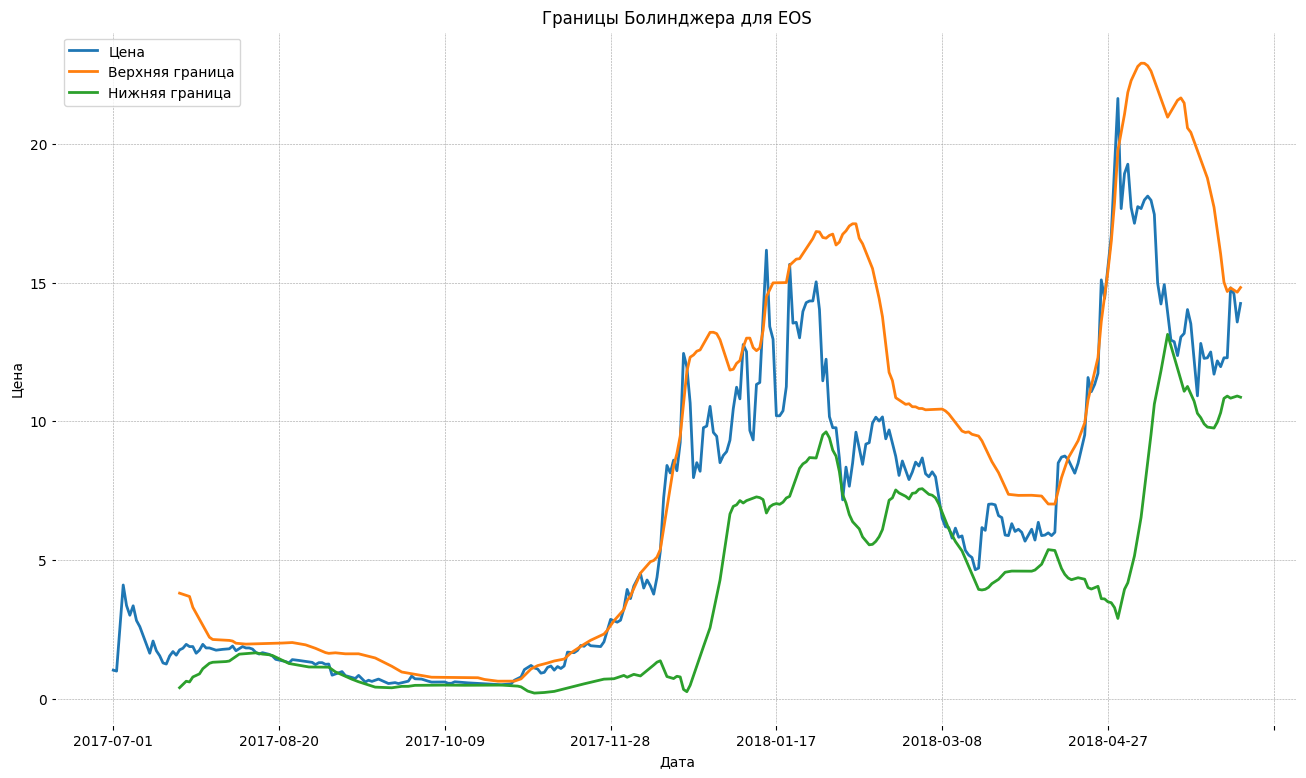

In [266]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Правило Боллинджера для EOS выполняется, цена зажата между границами.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [267]:
def plot_coins_capitalizations(coins, symbols, start_date):
    df = []
    for symbol in symbols:
        df.append(coins[coins['symbol'] == symbol][start_date:]['market'].sum())
    
    plt.bar(range(0, len(symbols)), df, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
    plt.xticks(range(0, len(symbols)), symbols)
    plt.xlabel("Валюты")
    plt.ylabel("Капитализация")
    plt.title("Общая капитализация")
    plt.show()
    
    df = pd.DataFrame()
    for symbol in symbols:
        df[symbol] = coins[coins['symbol'] == symbol]['market'][start_date:]
    df[list(symbols)].plot(figsize=(16,9))
    
    plt.xlabel("Дата")
    plt.ylabel("Kапитализация")
    plt.title("Капитализация Валют")
    
    plt.show()
    

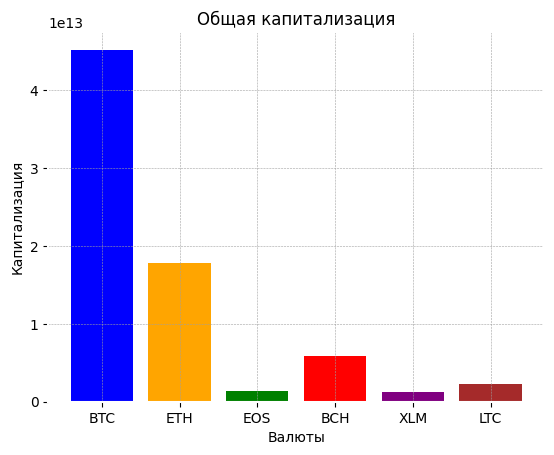

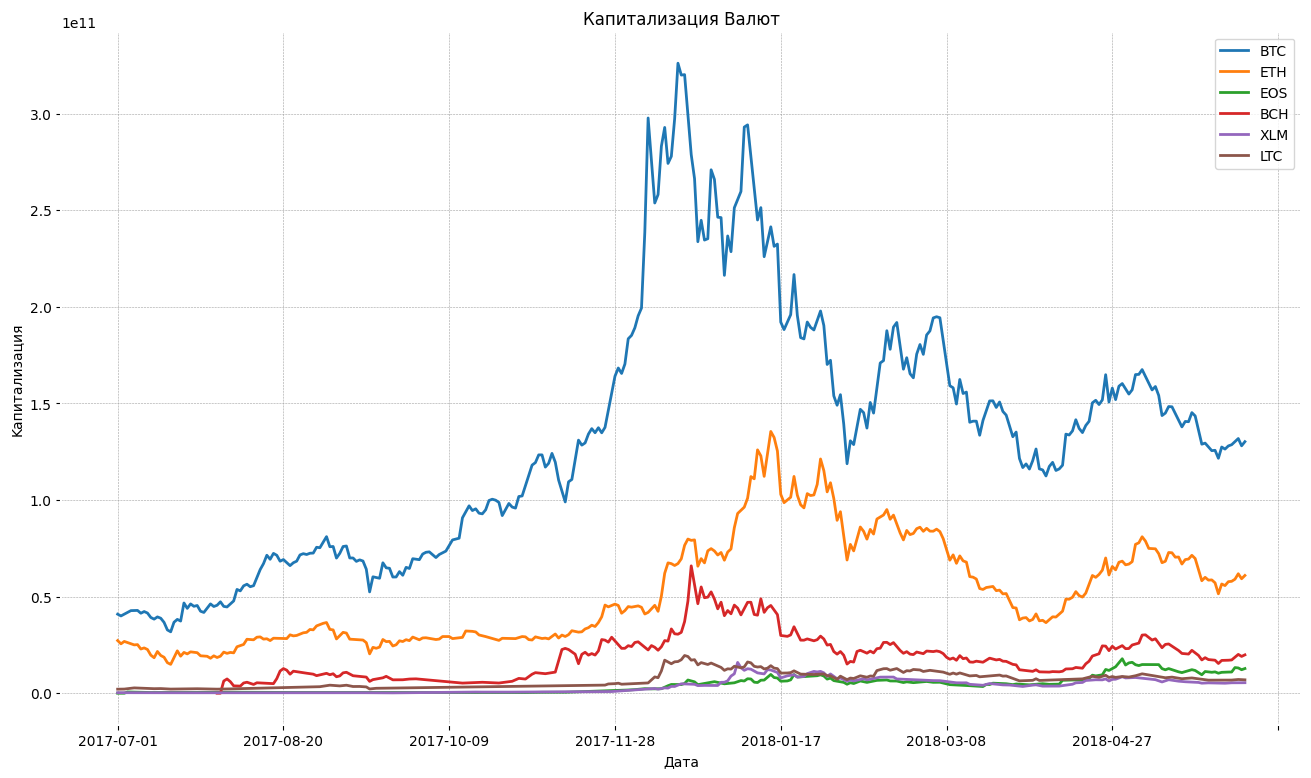

In [268]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Во времена резкой популярности криптовалют такие популярные криптовалюты как биткоин и альткойны стали резко набирать капитализацию, следовательно между ними видна некоторая зависимость и закономерность в росте капитализации.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [269]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [270]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    df = pd.DataFrame()
    
    for symbol in symbols:
        df[symbol] = coins[coins['symbol'] == symbol]['market']
        
    df = df[:date]
    df = df.tail(window)    
    return (df.ewm(alpha=alpha).corr(method ='spearman')).corr(method ='spearman')

In [271]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.73,-0.08,0.34,0.16,0.64,0.27
ETH,0.73,1.00,-0.00,0.41,0.30,0.70,0.31
EOS,-0.08,-0.00,1.00,-0.19,-0.14,-0.16,-0.20
BCH,0.34,0.41,-0.19,1.00,0.53,0.54,0.51
XLM,0.16,0.30,-0.14,0.53,1.00,0.52,0.71
LTC,0.64,0.70,-0.16,0.54,0.52,1.00,0.41
ADA,0.27,0.31,-0.20,0.51,0.71,0.41,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [272]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.14,-0.36,-0.39,-0.22,-0.05,-0.31
ETH,0.14,1.00,0.16,0.03,-0.15,0.64,-0.03
EOS,-0.36,0.16,1.00,0.65,0.60,0.24,0.49
BCH,-0.39,0.03,0.65,1.00,0.32,0.17,0.45
XLM,-0.22,-0.15,0.60,0.32,1.00,0.06,0.67
LTC,-0.05,0.64,0.24,0.17,0.06,1.00,0.20
ADA,-0.31,-0.03,0.49,0.45,0.67,0.20,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

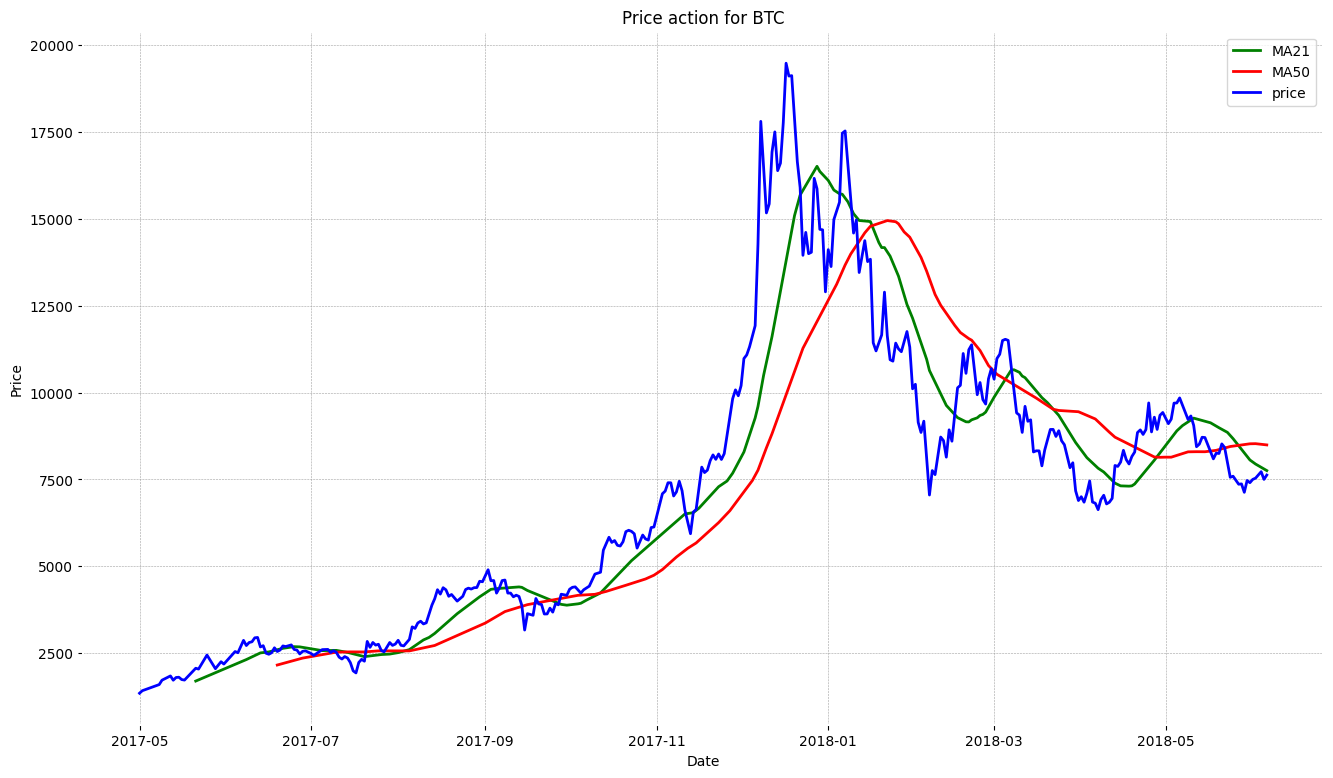

In [289]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [290]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    fig = plt.figure(figsize=(16, 9))
    plot_left = fig.add_subplot(1, 2, 1)
    plot_right = fig.add_subplot(1, 2, 2)
    prev_bought = True
    def prev_was_bought():
        prev_bought = True
        return True
    def prev_was_cell():
        prev_bought = False
        return False
    coin['close'].plot(ax=plot_right)
    coin['lead'] = coin['close'].rolling(lead_window).mean()
    coin['lead'].plot(ax=plot_right)
    coin['lag'] = coin['close'].rolling(lag_window).mean()
    coin['lag'].plot(ax=plot_right)
    coin['multiplier'] = coin['close'] / coin['close'].shift(1)
    coin['multiplier'].cumprod().plot(ax=plot_left)
    coin['buy'] = (coin['lead'] - coin['lag']) / coin['close'] > threshold
    coin['sell'] = (coin['lag'] - coin['lead']) / coin['close'] > threshold
    coin['bought'] = np.where(coin['buy'], prev_was_bought(), np.where(coin['sell'], prev_was_cell(), prev_bought))
    coin['moving_avg_multiplier'] = np.where(coin['bought'], coin['multiplier'], 1)
    coin['moving_avg_multiplier'].cumprod().plot(ax=plot_left)
    plt.show()

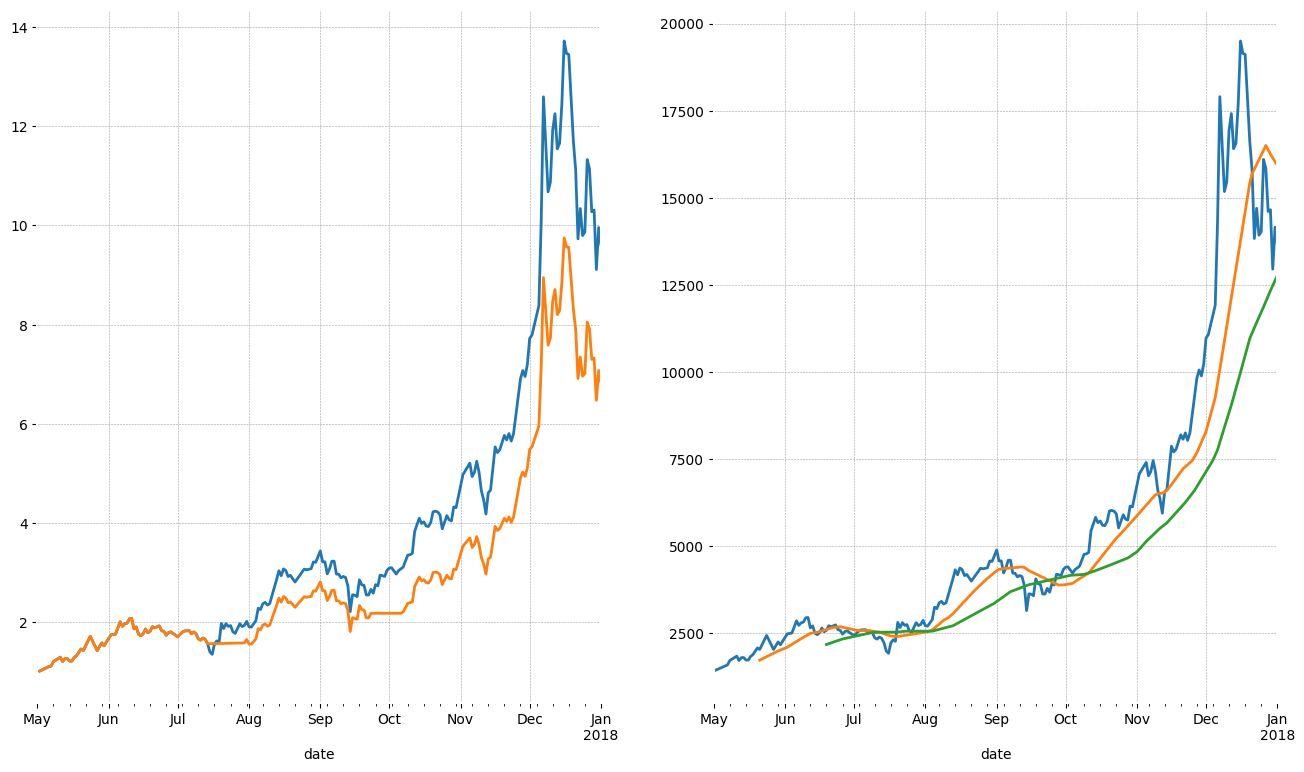

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

In [291]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

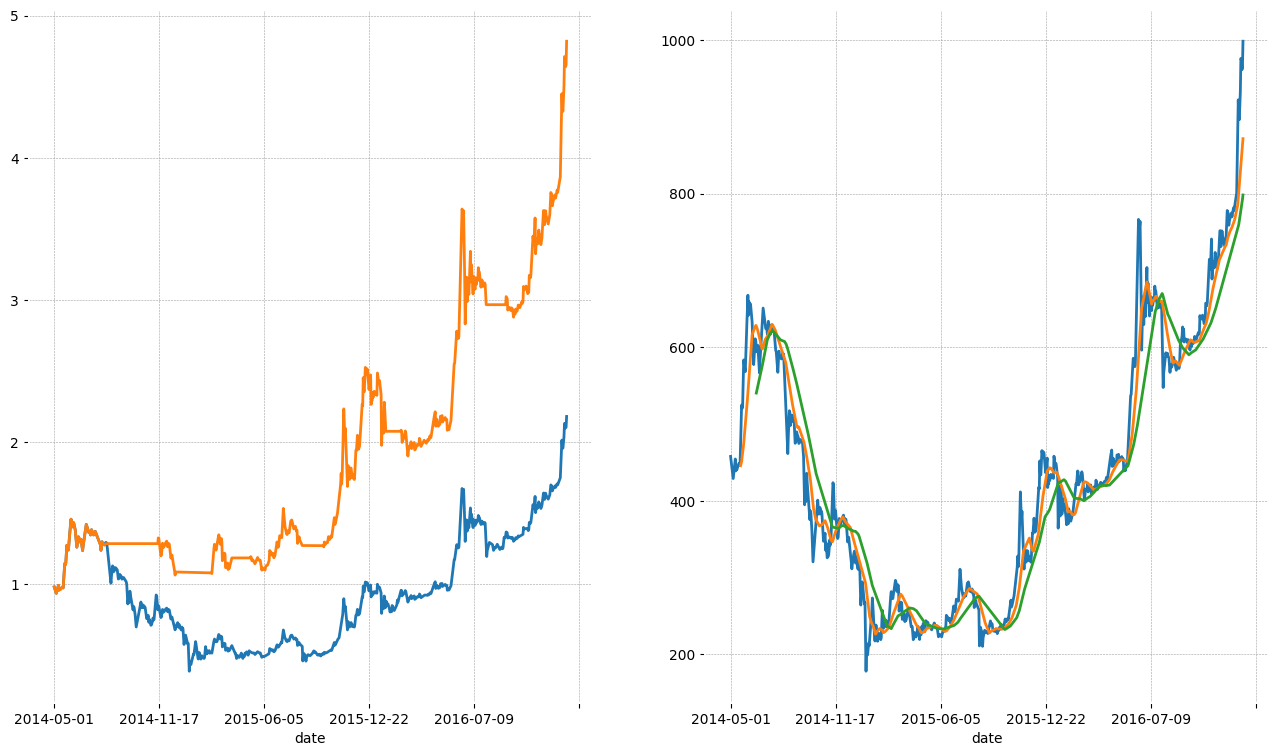

In [284]:
plot_moving_averages_strategy(coins, 'BTC', 20, 50, 0.02, '2014-05-01', '2017-01-01')

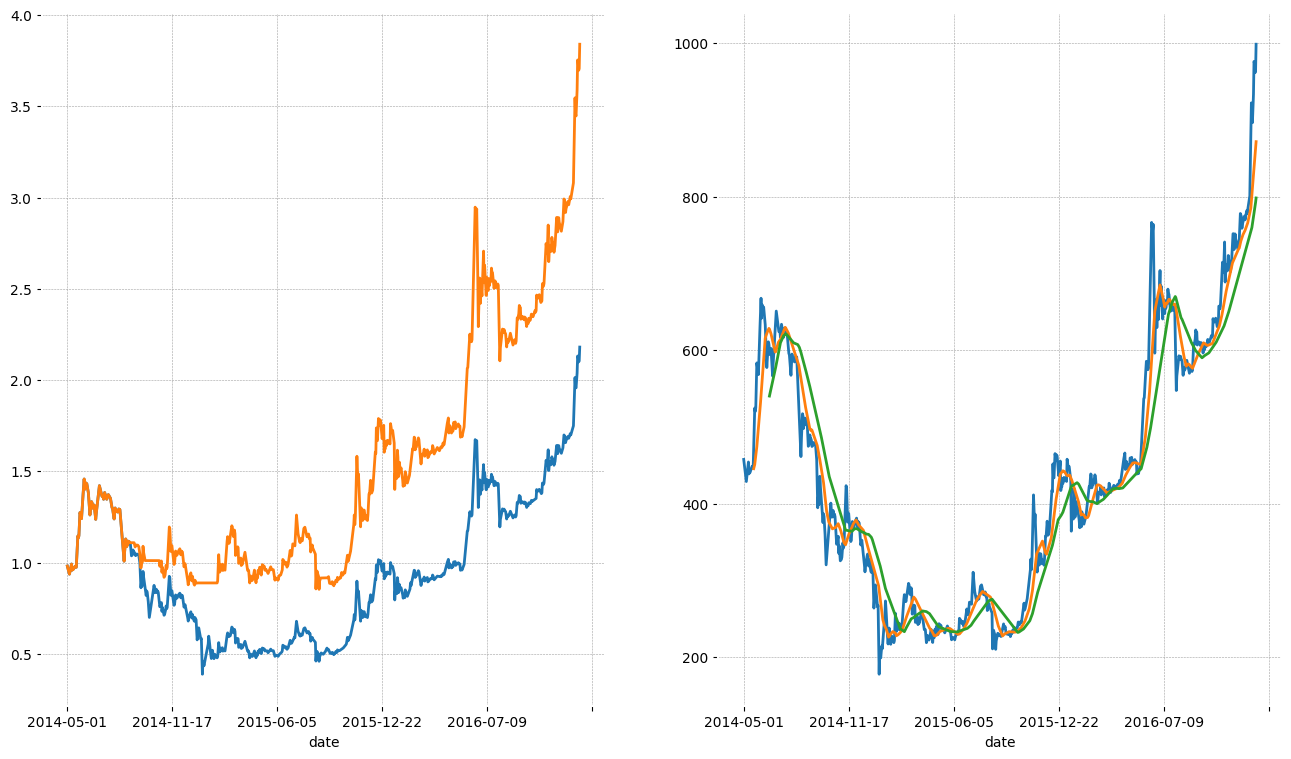

In [285]:
plot_moving_averages_strategy(coins, 'BTC', 20, 50, 0.1, '2014-05-01', '2017-01-01')

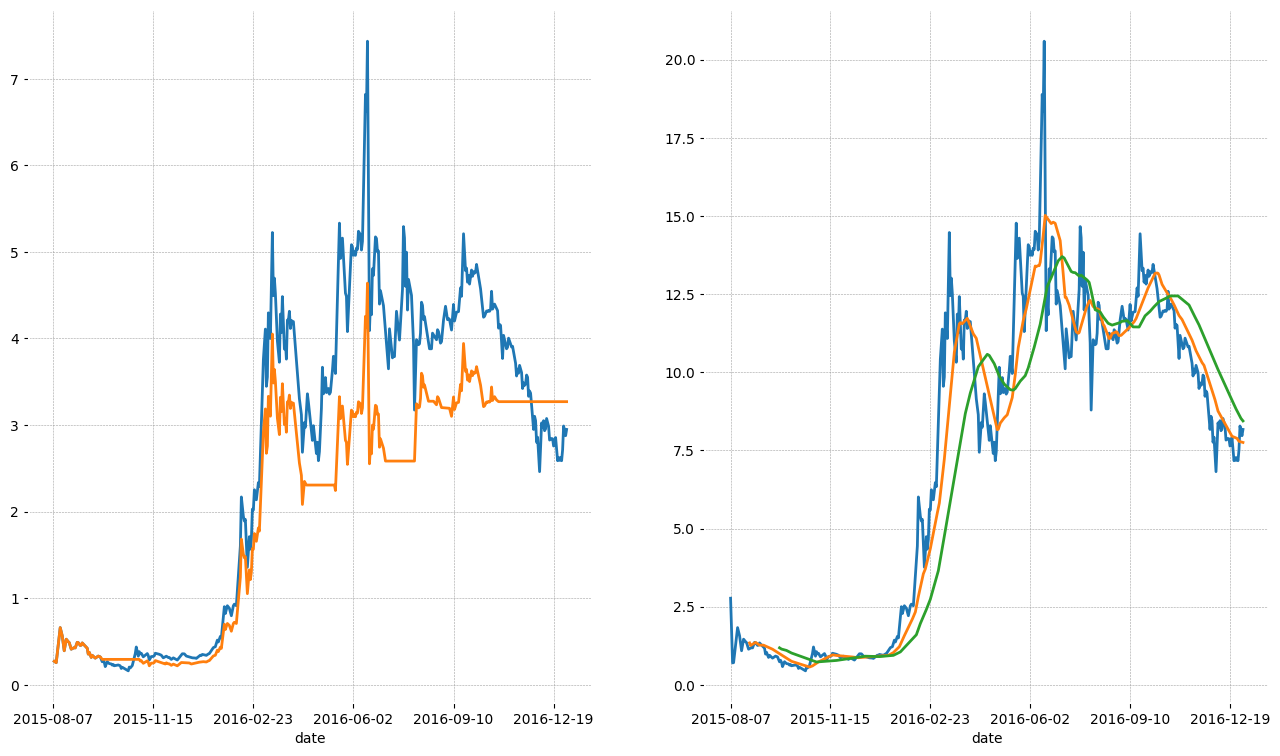

In [286]:
plot_moving_averages_strategy(coins, 'ETH', 20, 50, 0.03, '2014-05-01', '2017-01-01')

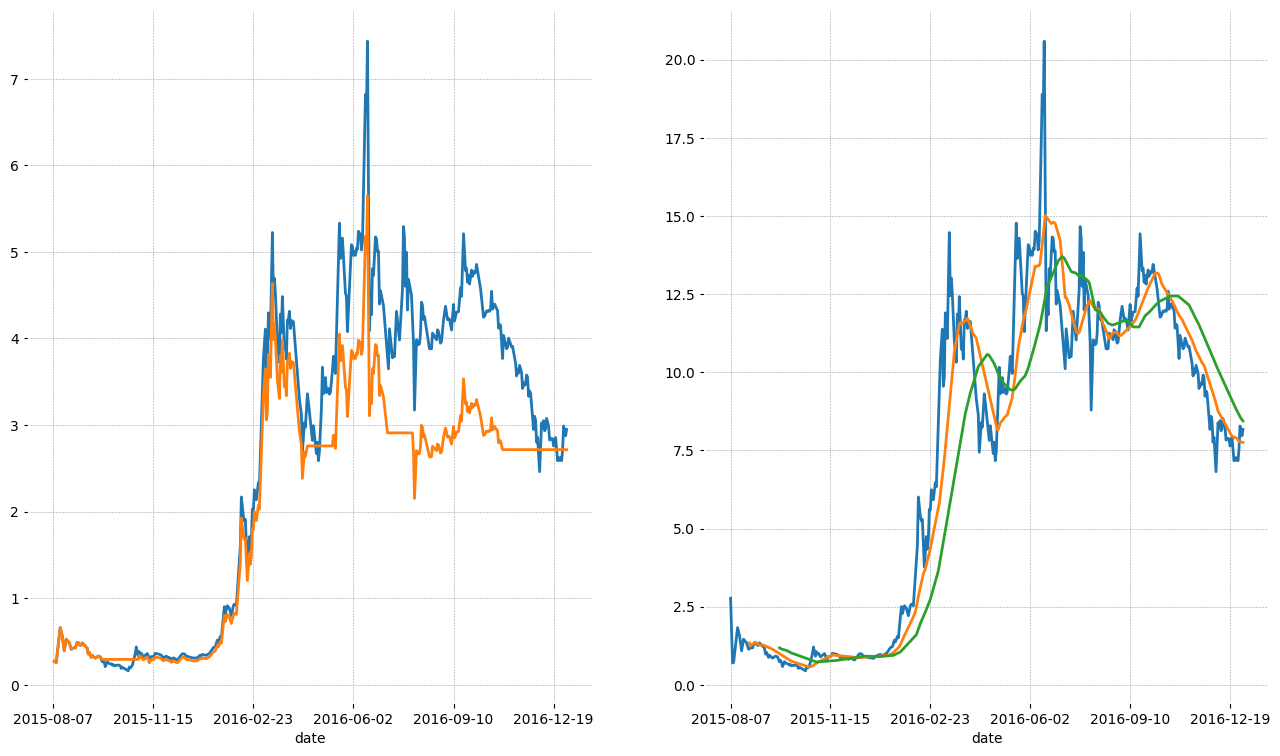

In [287]:
plot_moving_averages_strategy(coins, 'ETH', 20, 50, 0.05, '2014-05-01', '2017-01-01')

Эта модель довольно таки применима, так как она более стабильна чем стандартная инвестиционная, что позволяет уменьшить потери при падении, однако также уменьшить доходы при росте. Основная сложность заключается в том, какой threshold мы задаем. Если он большой, то мы действуем как раз таки будем действовать более стабильно, но и высокого подъема нам ожидать не стоит, а выбирая его маленьким, мы выигрываем при сильном росте, но проигрываем, если покупаем в момент, после которого цена сразу падает.

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.